In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# change the path to the location of the data files
# Read a CSV file into a DataFrame
applicants_1st = pd.read_csv('../raw_data/1stBatch_Applicants.csv')
# Display the first few rows of each DataFrame
print("Applicants Data:")
print(applicants_1st.head())
combined_1stBatch = pd.read_csv('../combined_and_clean_data/1stBatch_Combined.csv')
print("\nAccepted Data:")
print(combined_1stBatch.head())

Applicants Data:
   Student ID Age  Location           Highest Education Entranced  \
0           1  17      Shan              Pass 7th Grade   Biology   
1           2  15  Mandalay              Pass 7th Grade       NaN   
2           3  16    Yangon             Pass 10th Grade       bio   
3           4  22    Yangon             Pass 10th Grade    ??????   
4           5  24      Bago  Pass University First Year   Biology   

       Specilization in High School  Current Job/School  
0                           Student                 NaN  
1                               NaN                 NaN  
2                                 .                 NaN  
3                               Non                 NaN  
4  Technological university taungoo                 NaN  

Accepted Data:
   Student ID     GED -ID              Name  Age  Gender  Location  \
0           6  GED2024001   Aung Khant Hein   22    Male  Mandalay   
1          19  GED2024002     Khant Nyi Zin   16    Male  Mandal

3. Identification of underserved groups or gaps in participation that need attention.


Acceptance Summary:
              Location  Total Applicants  Total Accepted  Acceptance Rate
0                 Bago                 4             1.0        25.000000
1                Kayin                 1             0.0         0.000000
2               Magway                 1             0.0         0.000000
3             Mandalay                 5             2.0        40.000000
4                  Mon                 2             1.0        50.000000
5               Others                10             0.0         0.000000
6              Rakhine                 1             0.0         0.000000
7              Sagaing                 3             2.0        66.666667
8                 Shan                 1             0.0         0.000000
9           Taninthary                 1             0.0         0.000000
10  Thailand (Mae Sot)                 2             2.0       100.000000
11              Yangon                16             7.0        43.750000


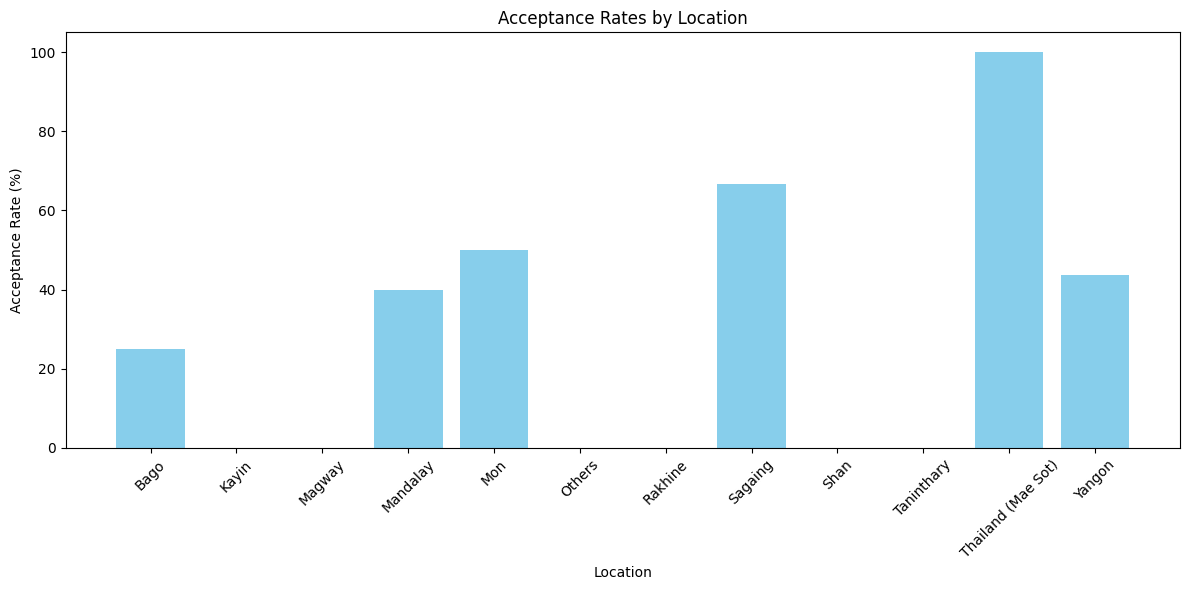

In [2]:
# Count the total number of applicants by location
applicant_counts = applicants_1st.groupby('Location').size().reset_index(name='Total Applicants')

# Count the number of accepted students by location
accepted_counts = combined_1stBatch.groupby('Location').size().reset_index(name='Total Accepted')

# Merge the two DataFrames on Location
acceptance_summary = pd.merge(applicant_counts, accepted_counts, on='Location', how='left').fillna(0)

# Calculate acceptance rates
acceptance_summary['Acceptance Rate'] = (acceptance_summary['Total Accepted'] / acceptance_summary['Total Applicants']) * 100

# Display the acceptance summary
print("\nAcceptance Summary:")
print(acceptance_summary)

# Plotting the acceptance rates by location
plt.figure(figsize=(12, 6))
plt.bar(acceptance_summary['Location'], acceptance_summary['Acceptance Rate'], color='skyblue')
plt.title('Acceptance Rates by Location')
plt.xlabel('Location')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###


Acceptance Summary:
              Location  Total Applicants  Total Accepted  Acceptance Rate
1               Others                10             0.0         0.000000
7                 Shan                 1             0.0         0.000000
9                Kayin                 1             0.0         0.000000
8               Magway                 1             0.0         0.000000
11             Rakhine                 1             0.0         0.000000
10          Taninthary                 1             0.0         0.000000
3                 Bago                 4             1.0        25.000000
2             Mandalay                 5             2.0        40.000000
0               Yangon                16             7.0        43.750000
5                  Mon                 2             1.0        50.000000
4              Sagaing                 3             2.0        66.666667
6   Thailand (Mae Sot)                 2             2.0       100.000000


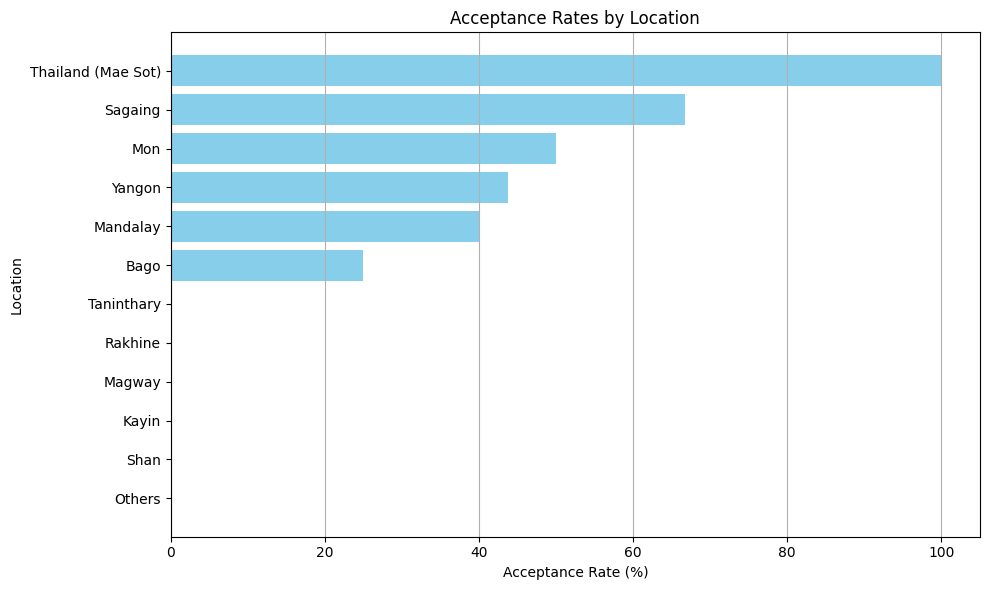

In [3]:
import pickle #for dataCombination in another notebook

# Step 1: Count total applicants by location
total_applicants = applicants_1st['Location'].value_counts().reset_index()
total_applicants.columns = ['Location', 'Total Applicants']

# Step 2: Merge accepted DataFrame with applicants to check for accepted students by location
accepted_by_location = combined_1stBatch.merge(applicants_1st[['Student ID', 'Location']], on='Student ID', how='inner')
# Now, we can choose to rename columns for clarity
accepted_by_location.rename(columns={'Location_x': 'Location', 'Location_y': 'Location (from Applicants)'}, inplace=True)
# Count accepted students by location
accepted_counts = accepted_by_location['Location'].value_counts().reset_index()
accepted_counts.columns = ['Location', 'Total Accepted']

# Step 3: Merge totals and accepted counts
acceptance_summary = pd.merge(total_applicants, accepted_counts, on='Location', how='left').fillna(0)

# Step 4: Calculate acceptance rates
acceptance_summary['Acceptance Rate'] = (acceptance_summary['Total Accepted'] / acceptance_summary['Total Applicants']) * 100

# Sort by Acceptance Rate in descending order
acceptance_summary.sort_values(by='Acceptance Rate', ascending=True, inplace=True)

# Save the DataFrame using pickle
with open('acceptance_summary.pkl', 'wb') as f:
    pickle.dump(acceptance_summary, f)

# Display acceptance summary
print("\nAcceptance Summary:")
print(acceptance_summary)

# Step 5: Visualization as a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(acceptance_summary['Location'], acceptance_summary['Acceptance Rate'], color='skyblue')
plt.title('Acceptance Rates by Location')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Location')
plt.grid(axis='x')  # Optional: Add gridlines for better readability
plt.tight_layout()
plt.show()


   Student ID     GED -ID              Name  Age  Gender  Location  \
0           6  GED2024001   Aung Khant Hein   22    Male  Mandalay   
1          19  GED2024002     Khant Nyi Zin   16    Male  Mandalay   
2          26  GED2024003    Shwe Yee Phyoe   19  Female   Sagaing   
3          41  GED2024004  Myat Ko Ko Khant   15    Male   Sagaing   
4           9  GED2024006    Kyal Sin Thwel   16  Female    Yangon   

            Highest Education Specilization in High School  \
0  Pass University First Year               အတွဲ(၇) ဇီဝဗေဒ   
1              Pass 7th Grade               Not applicable   
2             Pass 10th Grade                    သိပ္ပံတွဲ   
3              Pass 7th Grade                          NaN   
4              Pass 8th Grade                        အီကို   

                                  Current Job/School   Eng  Math  \
0                                            student  23.0  26.0   
1                                     Not applicable  39.0  38.0   
2 

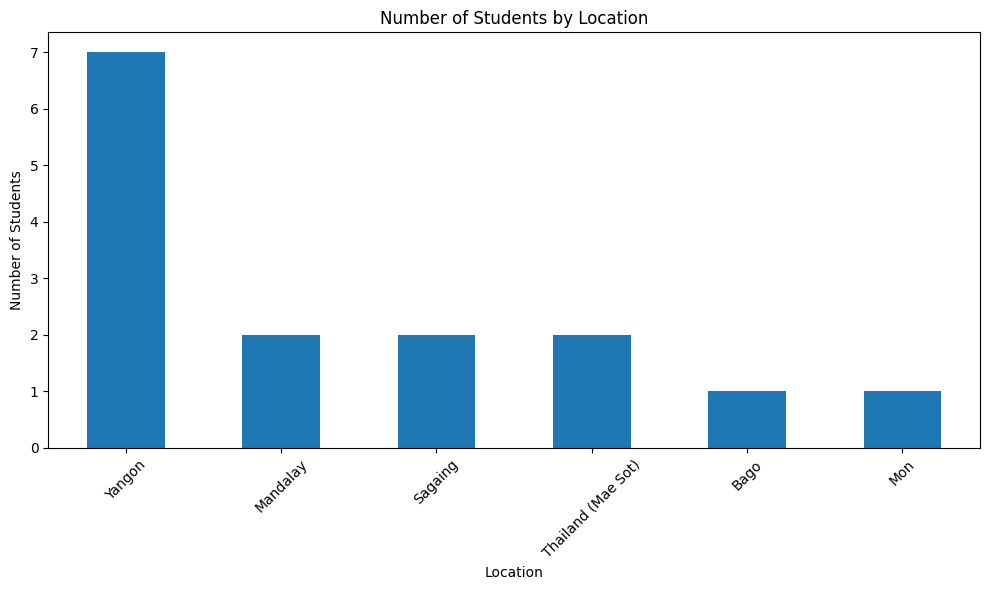

In [4]:
print(combined_1stBatch.head())

# Count the number of students in each location
location_counts = combined_1stBatch['Location'].value_counts()

# Display the counts
print(location_counts)

# Check if the selection is focused on one region
if location_counts.max() > (len(combined_1stBatch) / 2):
    print("The selection is focused on one region.")
else:
    print("The selection is diverse across regions.")

# Optional: Visualize the distribution of students by location
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Number of Students by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


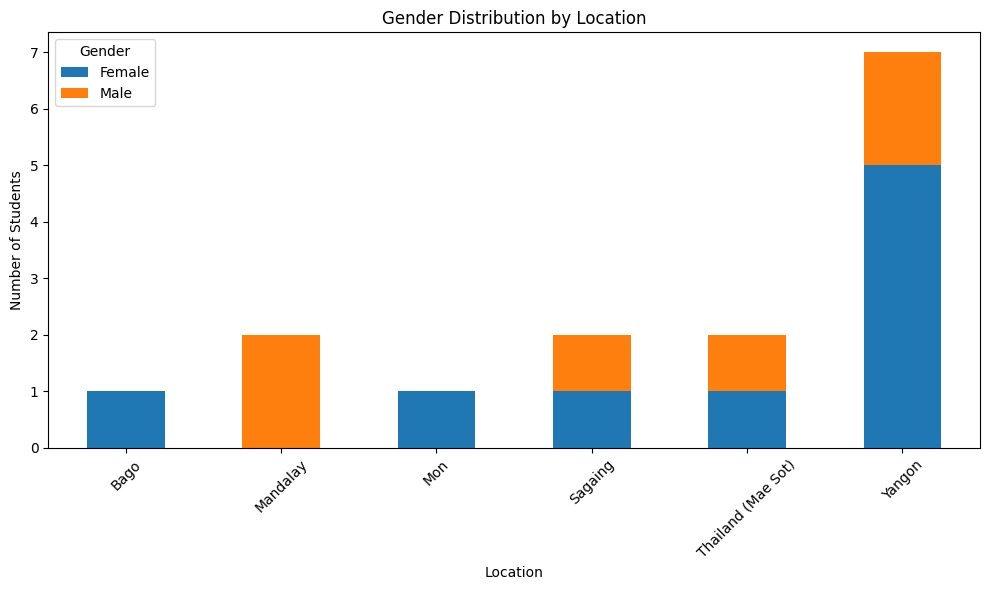

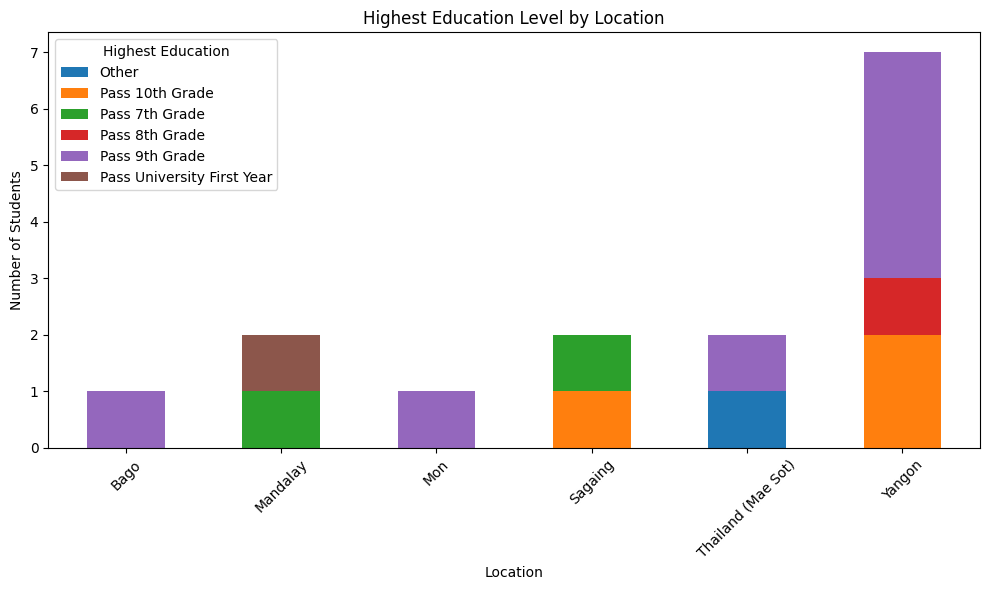

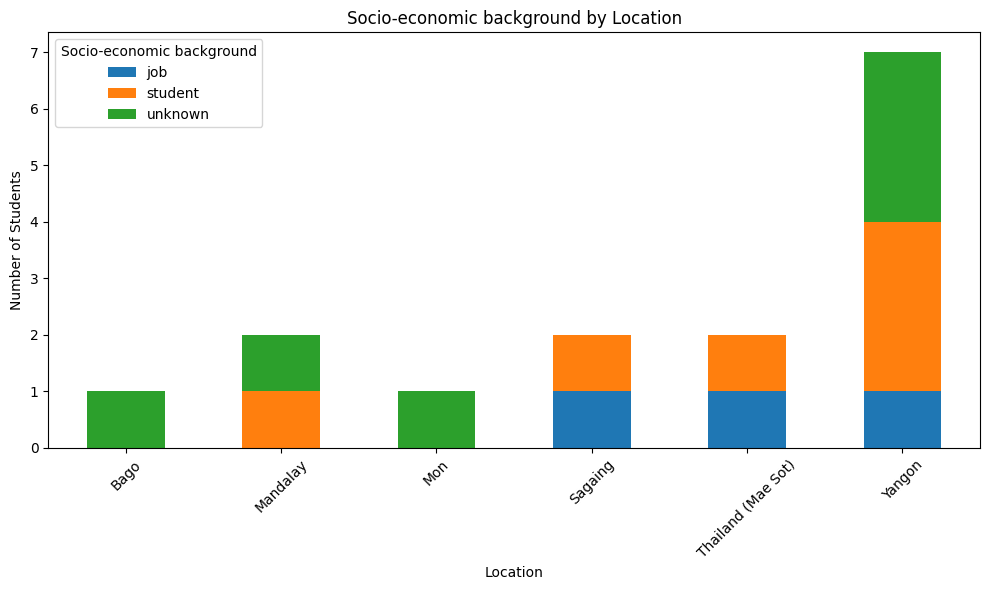

In [38]:
# 1. Gender Distribution by Location
gender_location = combined_1stBatch.groupby(['Location', 'Gender']).size().unstack()
gender_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 2. Highest Education Level by Location
education_location = combined_1stBatch.groupby(['Location', 'Highest Education']).size().unstack()
education_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Highest Education Level by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Highest Education')
plt.tight_layout()
plt.show()

# 3. Socio-economic background Analysis
job_location = combined_1stBatch.groupby(['Location', 'Socio-economic background']).size().unstack()
job_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Socio-economic background by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Socio-economic background')
plt.tight_layout()
plt.show()
